In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# load raw data

file_path = 'bv_body_data/predict/'
image = np.load (file_path + 'image.npy', mmap_mode='r')
label = np.load (file_path + 'label.npy', mmap_mode='r')

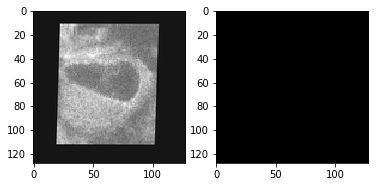

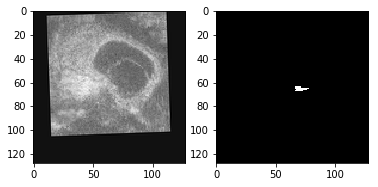

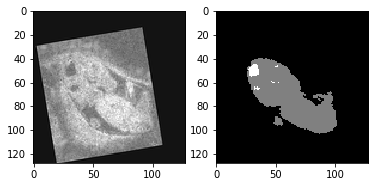

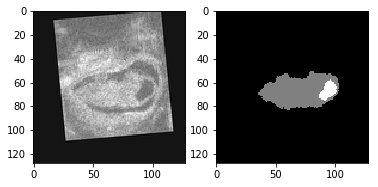

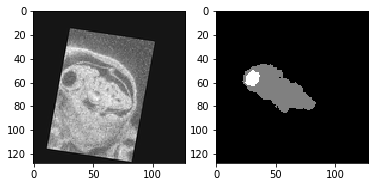

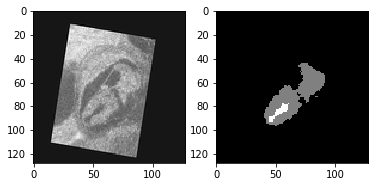

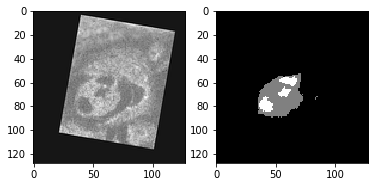

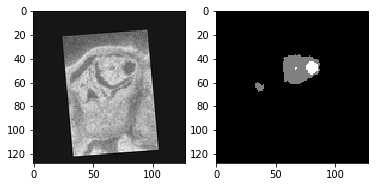

In [ ]:
from dataset import *
from niiutility import *

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

dataset = niiDataset(image, label, 
                         transform=transforms.Compose([
                             downSample(2),
                             RandomAffine(15, 10)
                         ])
                     )

for i in range(len(dataset)):
    sample = dataset[i]

    show_image(sample['image'], sample['label'])
    
    if i == 10:
        break

In [27]:
from loss import *
from dataset import *

temp_image = np.repeat (image[0:8, :,:,:],3,1).astype(np.float32)
temp_label = label[0:8,:,:,:,:].astype(np.float32)

sample = {'image':temp_image, 'label':temp_label}
device = torch.device('cpu')

temp_image, temp_label = toTensor(sample, device)

dice_loss(temp_image, temp_label)

KeyboardInterrupt: 